<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description: This program optimizes a stock portfolio


In [79]:
#Import libraries
import pandas as pd 
import numpy as np
import requests
import time
import pandas_datareader as web
import matplotlib.pyplot as plt

In [88]:
df = pd.DataFrame()
tickers = ['AAPL','MSFT','AMZN','GOOG','FB','TSLA','V','PG','DIS','BAC','XOM','BABA','GE','AMD','WMT','T','RRC','BBY','MA','PFE','JPM','SBUX']
for symbol in tickers:
  df[symbol] = web.DataReader(symbol, data_source = "yahoo", start = "2015-01-01", end = "2021-03-01")['Adj Close']
  time.sleep(1)

In [89]:
df

,AAPL,MSFT,AMZN,GOOG,FB,TSLA,V,PG,DIS,BAC,XOM,BABA,GE,AMD,WMT,T,RRC,BBY,MA,PFE,JPM,SBUX
Date,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,24.861401,41.443684,308.519989,523.373108,78.449997,43.862000,63.507534,74.930771,87.376266,15.947729,69.679512,103.599998,21.038706,2.670000,74.555740,23.715950,53.773563,32.133629,82.301964,23.594526,52.815960,36.396847
2015-01-05,24.161013,41.062580,302.190002,512.463013,77.190002,42.018002,62.105679,74.574486,86.099403,15.484441,67.772957,101.000000,20.652521,2.660000,74.338768,23.491886,50.434555,31.305229,79.986954,23.466497,51.176285,35.699646
2015-01-06,24.163294,40.459892,295.290009,500.585632,76.150002,42.256001,61.705475,74.234802,85.642708,15.021159,67.412659,103.320000,20.207563,2.630000,74.911591,23.526897,49.104778,31.023579,79.814072,23.662304,49.849342,35.409153
2015-01-07,24.502111,40.973934,298.420013,499.727997,76.150002,42.189999,62.532223,74.624222,86.518814,15.092433,68.095718,102.129997,20.215967,2.580000,76.899170,23.555304,47.677929,31.918240,81.055603,23.986134,49.925396,36.280643
2015-01-08,25.443539,42.179317,300.459991,501.303680,78.180000,42.124001,63.370945,75.477577,87.413536,15.404262,69.229149,105.029999,20.459427,2.610000,78.522209,23.789650,48.580620,32.398716,82.316399,24.475653,51.041042,36.866104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-23,125.860001,233.270004,3194.500000,2070.860107,265.859985,698.840027,212.110001,127.519997,197.089996,35.344448,55.049999,252.750000,12.580723,84.739998,135.470001,29.180000,10.430000,115.500000,350.420013,33.910000,150.610001,101.370003
2021-02-24,125.349998,234.550003,3159.530029,2095.169922,264.309998,742.020020,219.429993,127.660004,197.509995,36.200199,56.700001,250.339996,13.110332,86.940002,133.210007,29.379999,10.690000,113.459999,367.320007,33.750000,153.259995,104.379997
2021-02-25,120.989998,228.990005,3057.159912,2031.359985,254.690002,682.219971,213.750000,126.580002,190.979996,35.752422,55.759998,240.179993,12.750598,82.419998,131.949997,28.629999,10.250000,102.940002,354.570007,33.820000,151.179993,103.470001


In [90]:
assets = df.columns
assets

Index(['AAPL', 'MSFT', 'AMZN', 'GOOG', 'FB', 'TSLA', 'V', 'PG', 'DIS', 'BAC',
       'XOM', 'BABA', 'GE', 'AMD', 'WMT', 'T', 'RRC', 'BBY', 'MA', 'PFE',
       'JPM', 'SBUX'],
      dtype='object')

In [68]:
pip install PyPortfolioOpt

In [91]:
#Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [92]:
#Calculate the expected returns and covariuance
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)
print(mu)
print(s)

AAPL    0.305163
MSFT    0.327952
AMZN    0.459041
GOOG    0.251817
FB      0.218934
TSLA    0.575972
V       0.220939
PG      0.085811
DIS     0.139493
BAC     0.139627
XOM    -0.033813
BABA    0.147762
GE     -0.074173
AMD     0.760546
WMT     0.096537
T       0.027920
RRC    -0.239046
BBY     0.206131
MA      0.273007
PFE     0.059658
JPM     0.185727
SBUX    0.191525
dtype: float64
          AAPL      MSFT      AMZN  ...       PFE       JPM      SBUX
AAPL  0.088433  0.056286  0.050990  ...  0.024725  0.040320  0.038035
MSFT  0.056286  0.077012  0.056139  ...  0.027449  0.041956  0.041785
AMZN  0.050990  0.056139  0.095406  ...  0.019576  0.026342  0.033794
GOOG  0.048317  0.054750  0.054105  ...  0.024402  0.037644  0.038865
FB    0.054701  0.053672  0.059205  ...  0.022087  0.035068  0.039560
TSLA  0.062731  0.060737  0.061141  ...  0.021172  0.043686  0.044773
V     0.045707  0.050531  0.039725  ...  0.027029  0.047470  0.043243
PG    0.024303  0.026864  0.017968  ...  0.019020  

In [93]:
#Optimize sharpe ratio
ef = EfficientFrontier(mu,s,weight_bounds=(-1,1))
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.16344), ('MSFT', 0.29857), ('AMZN', 1.0), ('GOOG', 0.00621), ('FB', -0.41981), ('TSLA', 0.2509), ('V', -0.33331), ('PG', 0.09755), ('DIS', 0.08718), ('BAC', -0.41319), ('XOM', -0.5465), ('BABA', -0.32684), ('GE', -0.39797), ('AMD', 0.32966), ('WMT', 0.05853), ('T', -0.17554), ('RRC', -0.20864), ('BBY', 0.08091), ('MA', 0.50807), ('PFE', -0.19766), ('JPM', 1.0), ('SBUX', 0.13844)])
Expected annual return: 120.7%
Annual volatility: 54.2%
Sharpe Ratio: 2.19


(1.207078530401278, 0.5423030452388021, 2.188957891391796)

In [41]:
pip install pulp

     |████████████████████████████████| 40.6MB 104kB/s 


In [94]:
#Get the discrete allocation 
from pypfopt.discrete_allocation import  DiscreteAllocation, get_latest_prices

portfolio_val = 10000
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = portfolio_val)
allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds Remaining: $', leftover)

Discrete allocation: {'AAPL': 3, 'MSFT': 3, 'AMZN': 1, 'TSLA': 1, 'PG': 1, 'DIS': 1, 'AMD': 9, 'WMT': 1, 'BBY': 1, 'MA': 3, 'JPM': 16, 'SBUX': 2, 'FB': -16, 'V': -15, 'BAC': -116, 'XOM': -97, 'BABA': -14, 'GE': -302, 'T': -62, 'RRC': -206, 'PFE': -58}
Funds Remaining: $ 3.88642654418436


In [95]:
#Create a function to get the companies name
def get_company_name(symbol):
  url = 'http://d.yimg.com/autoc.finance.yahoo.com/autoc?query='+symbol+'&region=1&lang=en'
  result = requests.get(url).json()
  for r in result['ResultSet']['Result']:
    if r['symbol'] == symbol:
      return r['name']


In [96]:
#Store the company name into a list
company_name = []
for symbol in allocation:
  company_name.append(get_company_name(symbol))

In [97]:
#Get the discrete allocation values
discrete_allocation_list = []
for symbol in allocation:
  discrete_allocation_list.append(allocation.get(symbol))

In [98]:
#Creare a data for the portfolio
portfolio_df = pd.DataFrame(columns=['Company_name','Company_Ticker', 'Discrete_val_'+str(portfolio_val)]) 

portfolio_df['Company_name'] =  company_name
portfolio_df['Company_Ticker'] =  allocation
portfolio_df['Discrete_val_'+str(portfolio_val)] =  discrete_allocation_list

portfolio_df

,Company_name,Company_Ticker,Discrete_val_10000
0,Apple Inc.,AAPL,3
1,Microsoft Corporation,MSFT,3
2,"Amazon.com, Inc.",AMZN,1
3,"Tesla, Inc.",TSLA,1
4,The Procter & Gamble Company,PG,1
5,The Walt Disney Company,DIS,1
6,"Advanced Micro Devices, Inc.",AMD,9
7,Walmart Inc.,WMT,1
8,"Best Buy Co., Inc.",BBY,1
9,Mastercard Incorporated,MA,3


In [99]:
from pypfopt import plotting

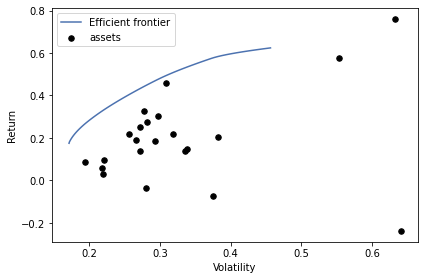

In [104]:
# Efficient Frontier
ef = EfficientFrontier(mu, s)
ef.add_constraint(lambda w: w[0] >= 0.2)
ef.add_constraint(lambda w: w[2] == 0.15)
ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

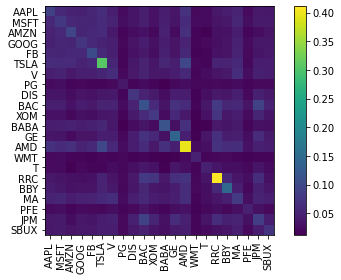

In [102]:
cov = plotting.plot_covariance(s, plot_correlation=False, show_tickers=True)